In [1]:
!pip install wordcloud

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading the dataset

In [3]:
df=pd.read_csv(r"E:\Kaggle datasets\US_Accidents_March23.csv")

'''ID This is a unique identifier of the accident record.


Source:
Source of raw accident data

Severity:
Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result o


Start_Time:
Shows start time of the accident in local time zone.

End_Time:
Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat:
Shows latitude in GPS coordinate of the start point.

Start_Lng:
Shows longitude in GPS coordinate of the start point.

End_Lat:
Shows latitude in GPS coordinate of the end point.

End_Lng:
Shows longitude in GPS coordinate of the end point.

Distance(mi):
The length of the road extent affected by the accident in miles.'''

# Data Preparation

In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,A-1058341,Source2,2,05-05-2021 08:05,05-05-2021 09:06,33.021568,-96.795158,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
1048571,A-1058342,Source2,2,05-05-2021 08:38,05-05-2021 09:25,32.741482,-96.682961,NaN,NaN,0.00,...,False,True,False,False,True,False,Day,Day,Day,Day
1048572,A-1058343,Source2,3,05-05-2021 08:39,05-05-2021 11:27,32.924210,-96.769173,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
1048573,A-1058344,Source2,3,05-05-2021 08:58,05-05-2021 09:44,32.908890,-96.450020,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1048570,A-1058341,Source2,2,05-05-2021 08:05,05-05-2021 09:06,33.021568,-96.795158,NaN,NaN,0.0,...,False,False,False,False,True,False,Day,Day,Day,Day
1048571,A-1058342,Source2,2,05-05-2021 08:38,05-05-2021 09:25,32.741482,-96.682961,NaN,NaN,0.0,...,False,True,False,False,True,False,Day,Day,Day,Day
1048572,A-1058343,Source2,3,05-05-2021 08:39,05-05-2021 11:27,32.924210,-96.769173,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1048573,A-1058344,Source2,3,05-05-2021 08:58,05-05-2021 09:44,32.908890,-96.450020,NaN,NaN,0.0,...,False,False,False,False,True,False,Day,Day,Day,Day
1048574,A-1058345,Source2,2,05-05-2021 09:28,05-05-2021 09:57,32.693405,-96.823097,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  object 
 1   Source                 1048575 non-null  object 
 2   Severity               1048575 non-null  int64  
 3   Start_Time             1048575 non-null  object 
 4   End_Time               1048575 non-null  object 
 5   Start_Lat              1048575 non-null  float64
 6   Start_Lng              1048575 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1048575 non-null  float64
 10  Description            1048574 non-null  object 
 11  Street                 1046863 non-null  object 
 12  City                   1048546 non-null  object 
 13  County                 1048575 non-null  object 
 14  State             

In [9]:
df.isna().sum().sort_values(ascending = False)

End_Lat                  1048575
End_Lng                  1048575
Precipitation(in)         476988
Wind_Chill(F)             461517
Wind_Speed(mph)           101226
Visibility(mi)             19523
Weather_Condition          18816
Humidity(%)                17224
Temperature(F)             15911
Wind_Direction             14398
Pressure(in)               12927
Weather_Timestamp          10389
Street                      1712
Nautical_Twilight           1637
Civil_Twilight              1637
Sunrise_Sunset              1637
Astronomical_Twilight       1637
Airport_Code                1554
Timezone                     478
Zipcode                      139
City                          29
Description                    1
No_Exit                        0
Severity                       0
Start_Time                     0
End_Time                       0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station   

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.048575e+06,1.048575e+06,1.048575e+06,0.0,0.0,1.048575e+06,1.032664e+06,587058.000000,1.031351e+06,1.035648e+06,1.029052e+06,947349.000000,571587.000000
mean,2.321943e+00,3.606598e+01,-9.463107e+01,NaN,NaN,1.748895e-01,6.483367e+01,60.219139,6.591105e+01,2.968095e+01,9.186809e+00,7.750171,0.012675
std,5.464841e-01,4.899255e+00,1.732592e+01,NaN,NaN,1.475837e+00,1.726310e+01,21.477180,2.194785e+01,8.021891e-01,2.268001e+00,5.396705,0.195112
min,1.000000e+00,2.455480e+01,-1.244974e+02,NaN,NaN,0.000000e+00,-7.780000e+01,-50.000000,1.000000e+00,1.200000e-01,0.000000e+00,0.000000,0.000000
25%,2.000000e+00,3.293387e+01,-1.173193e+02,NaN,NaN,0.000000e+00,5.400000e+01,45.000000,5.000000e+01,2.953000e+01,1.000000e+01,4.600000,0.000000
50%,2.000000e+00,3.527291e+01,-8.793123e+01,NaN,NaN,0.000000e+00,6.700000e+01,65.000000,6.800000e+01,2.991000e+01,1.000000e+01,7.000000,0.000000
75%,3.000000e+00,4.011330e+01,-8.089787e+01,NaN,NaN,1.000000e-02,7.700000e+01,76.000000,8.400000e+01,3.005000e+01,1.000000e+01,10.400000,0.000000
max,4.000000e+00,4.899809e+01,-6.816079e+01,NaN,NaN,3.365700e+02,1.960000e+02,196.000000,1.000000e+02,5.810000e+01,1.110000e+02,822.800000,36.470000


# Data Analysis and Visualization

We need the total numbers for each column in descending order-

What is the percentage share of missing values for each column in the entire data?

In [11]:
missing_percentage = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentage
#sort out the ones with zeroes
missing_percentage[missing_percentage != 0]


End_Lat                  1.000000e+00
End_Lng                  1.000000e+00
Precipitation(in)        4.548916e-01
Wind_Chill(F)            4.401373e-01
Wind_Speed(mph)          9.653673e-02
Visibility(mi)           1.861860e-02
Weather_Condition        1.794435e-02
Humidity(%)              1.642610e-02
Temperature(F)           1.517393e-02
Wind_Direction           1.373102e-02
Pressure(in)             1.232816e-02
Weather_Timestamp        9.907732e-03
Street                   1.632692e-03
Nautical_Twilight        1.561166e-03
Civil_Twilight           1.561166e-03
Sunrise_Sunset           1.561166e-03
Astronomical_Twilight    1.561166e-03
Airport_Code             1.482011e-03
Timezone                 4.558568e-04
Zipcode                  1.325609e-04
City                     2.765658e-05
Description              9.536752e-07
dtype: float64

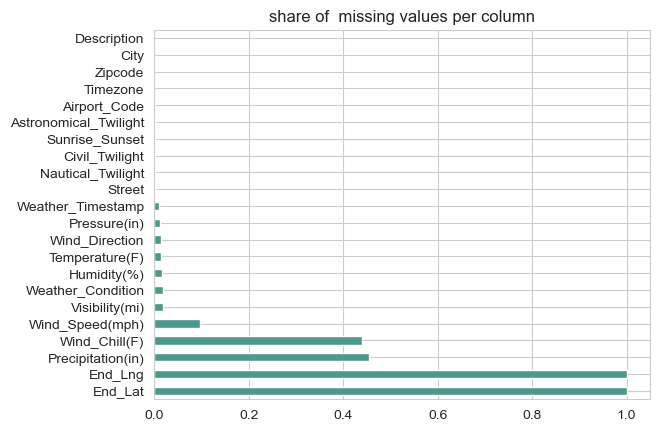

In [48]:
missing_percentage[missing_percentage != 0].plot(kind = "barh",color="#4b998c")
plt.title("share of  missing values per column")
plt.show()


# State

In [13]:
df.State.value_counts()

CA    264077
TX    127293
FL    100420
PA     50987
NY     45050
SC     44634
IL     39664
MI     38435
GA     33399
NC     29987
OH     29389
VA     25528
WA     21466
MA     21422
AL     18774
NJ     17761
MD     16508
TN     14290
LA     11554
AZ     10576
NE      9644
CT      8854
MO      8285
OK      8252
CO      7093
MN      5952
UT      5882
IN      4774
KY      4128
IA      4076
RI      3813
OR      3142
WI      2532
NV      1860
DE      1621
NM      1527
DC      1454
NH      1276
KS      1160
MS      1015
AR       527
ME       245
VT       102
WV        94
ID        33
WY         7
MT         5
ND         4
SD         4
Name: State, dtype: int64

Let’s look at the top ten states by the number of accidents. we need the absolute number of accidents against each state.



In [14]:
states_by_accident = df.State.value_counts()
states_by_accident[:10]

CA    264077
TX    127293
FL    100420
PA     50987
NY     45050
SC     44634
IL     39664
MI     38435
GA     33399
NC     29987
Name: State, dtype: int64

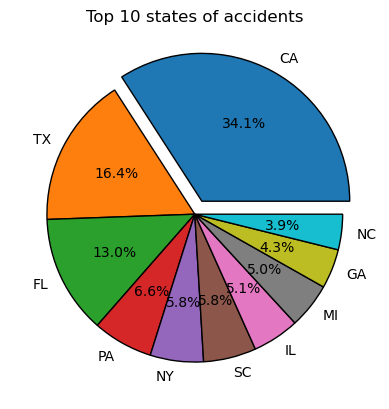

In [15]:
States=df["State"].value_counts().head(10).values
name=df["State"].value_counts().head(10).index
plt.pie(States,labels=name,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.title('Top 10 states of accidents')
plt.show()

# city

In [16]:
df.City.unique()


array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Pollocksville',
       'Morgan City', 'Winnie'], dtype=object)

In [17]:
citys_by_accidents=df.City.value_counts()

In [18]:
citys_by_accidents

Houston           41308
Dallas            29194
Los Angeles       27322
Austin            23359
Charlotte         15457
                  ...  
Bridgeboro            1
McComb                1
Rehoboth              1
Etowah                1
Russells Point        1
Name: City, Length: 8874, dtype: int64

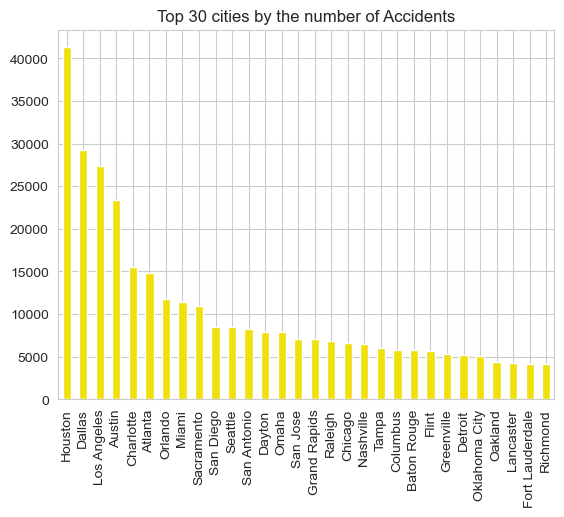

In [47]:
citys_by_accidents[:30].plot(kind="bar",color="#f0e10e")

plt.title("Top 30 cities by the number of Accidents")
plt.show()

<Axes: xlabel='City', ylabel='Count'>

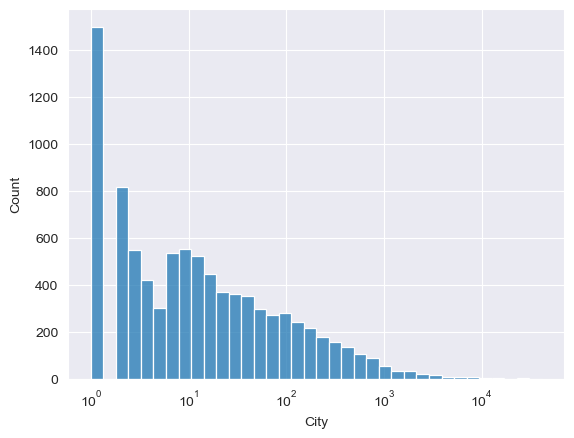

In [50]:
sns.set_style("darkgrid")
#plotting a hitogram with a logarithmic scale
sns.color_palette("Spectral", as_cmap=True)


sns.histplot(citys_by_accidents,log_scale=True)


In [21]:
high_accident_citys=citys_by_accidents[citys_by_accidents>=1000]

In [22]:
high_accident_citys

Houston          41308
Dallas           29194
Los Angeles      27322
Austin           23359
Charlotte        15457
                 ...  
Sterling          1021
Castro Valley     1006
Pottstown         1006
Tuscaloosa        1004
Hartford          1003
Name: City, Length: 162, dtype: int64

In [23]:
low_accident_citys=citys_by_accidents[citys_by_accidents<=1000]

In [24]:
low_accident_citys

Escondido         999
Conshohocken      997
Colton            977
Pensacola         969
Newhall           968
                 ... 
Bridgeboro          1
McComb              1
Rehoboth            1
Etowah              1
Russells Point      1
Name: City, Length: 8712, dtype: int64

In [25]:
len(high_accident_citys)/len(citys_by_accidents)

0.018255578093306288

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

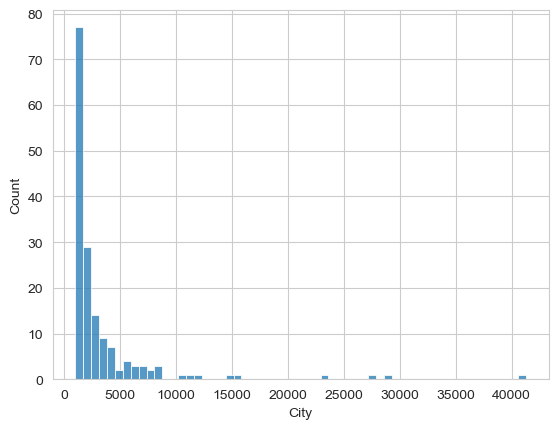

In [52]:
sns.set_style("whitegrid")
sns.histplot(high_accident_citys)
sns.color_palette("deep", 10)


<Axes: xlabel='City', ylabel='Count'>

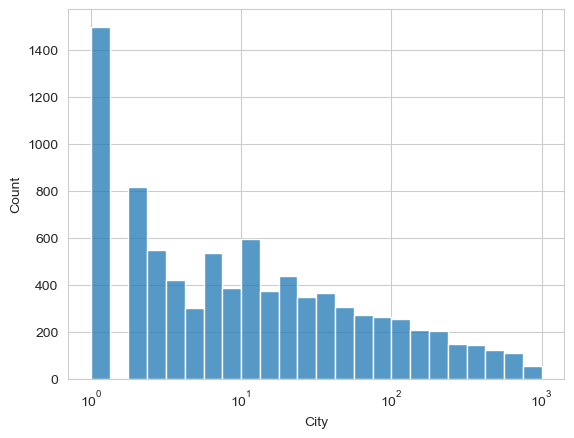

In [54]:
sns.histplot(low_accident_citys, log_scale = True)


# Start Time

In [28]:
#pull the column from the data
df.Start_Time

0          08-02-2016 05:46
1          08-02-2016 06:07
2          08-02-2016 06:49
3          08-02-2016 07:23
4          08-02-2016 07:39
                 ...       
1048570    05-05-2021 08:05
1048571    05-05-2021 08:38
1048572    05-05-2021 08:39
1048573    05-05-2021 08:58
1048574    05-05-2021 09:28
Name: Start_Time, Length: 1048575, dtype: object

In [29]:
#Convert the string to Timestamp format
df.Start_Time=pd.to_datetime(df.Start_Time)

In [30]:
#extract hour from timestamp
df.Start_Time.dt.hour

0          5
1          6
2          6
3          7
4          7
          ..
1048570    8
1048571    8
1048572    8
1048573    8
1048574    9
Name: Start_Time, Length: 1048575, dtype: int64

C:\Users\Lenovo l460\AppData\Local\Temp\ipykernel_1464\835785861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins=24,norm_hist=True)


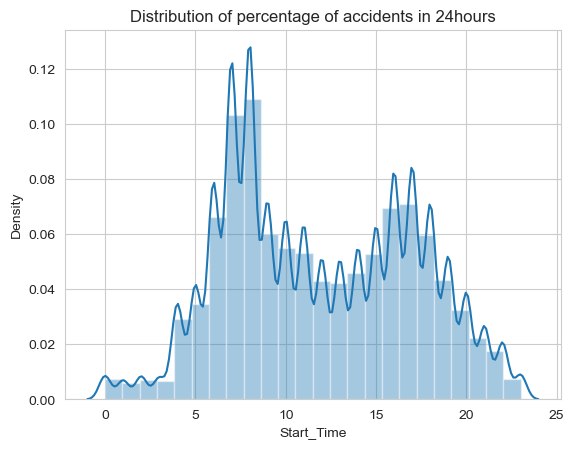

In [31]:
sns.distplot(df.Start_Time.dt.hour,bins=24,norm_hist=True)
plt.title("Distribution of percentage of accidents in 24hours")
plt.show()

C:\Users\Lenovo l460\AppData\Local\Temp\ipykernel_1464\3457429895.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

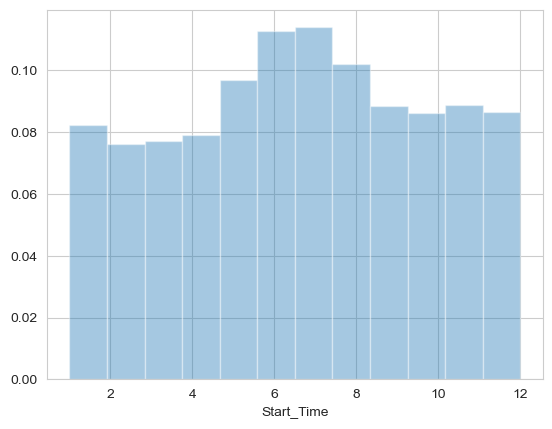

In [32]:
#plot for months
sns.distplot(df.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)


C:\Users\Lenovo l460\AppData\Local\Temp\ipykernel_1464\1295355848.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)


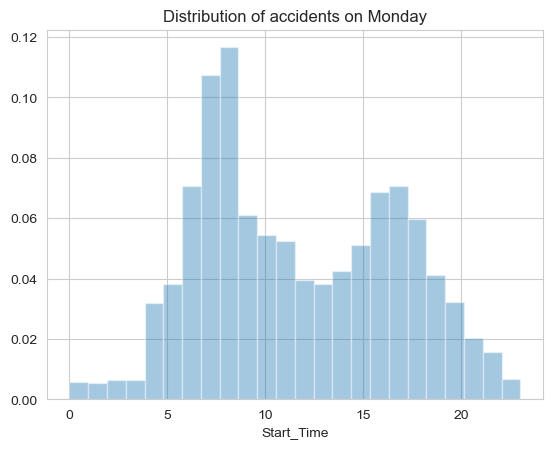

In [57]:
#pull the day of the week from the timestamp format
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
#plot the distribution
sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)
sns.color_palette("flare", as_cmap=True)

plt.title("Distribution of accidents on Monday")
plt.show()

C:\Users\Lenovo l460\AppData\Local\Temp\ipykernel_1464\876716506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)


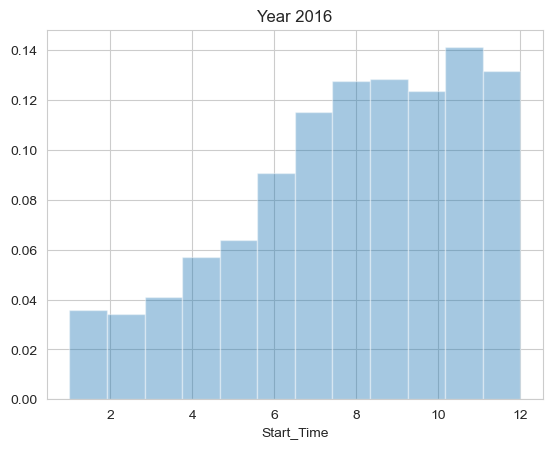

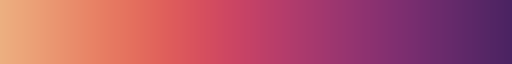

In [58]:
#2016
df_2016 = df[df.Start_Time.dt.year == 2016]
ax=sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
plt.title("Year 2016")
plt.show()
sns.color_palette("flare", as_cmap=True)


C:\Users\Lenovo l460\AppData\Local\Temp\ipykernel_1464\834922674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_2021.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)


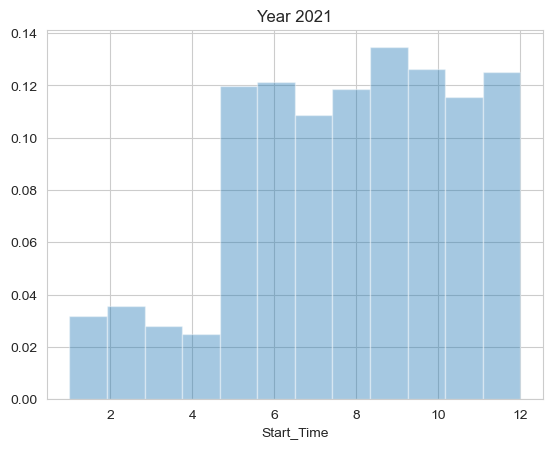

In [56]:
#2021
df_2021 = df[df.Start_Time.dt.year == 2021]
ax=sns.distplot(df_2021.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)
sns.color_palette("Spectral", as_cmap=True)

plt.title("Year 2021")
plt.show()


# Tempararture(F)

In [36]:
df['Temperature(F)'].value_counts()

77.0     28128
68.0     26753
73.0     26104
72.0     24869
75.0     24206
         ...  
103.8        1
8.8          1
5.4          1
106.9        1
116.0        1
Name: Temperature(F), Length: 700, dtype: int64

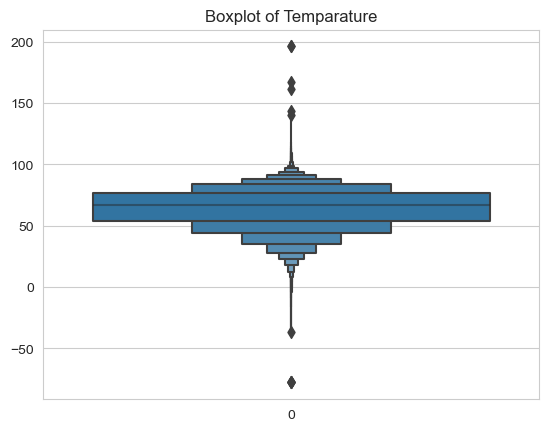

In [37]:
sns.boxenplot(df['Temperature(F)'])
plt.title("Boxplot of Temparature")
plt.show()

In [38]:
df.Weather_Condition.value_counts()

Fair                  258734
Clear                 208905
Mostly Cloudy         142608
Partly Cloudy          98637
Overcast               80265
                       ...  
Tornado                    1
Snow Grains                1
Heavy Rain Showers         1
Snow Showers               1
Duststorm                  1
Name: Weather_Condition, Length: 109, dtype: int64

In [39]:

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Weather condition 

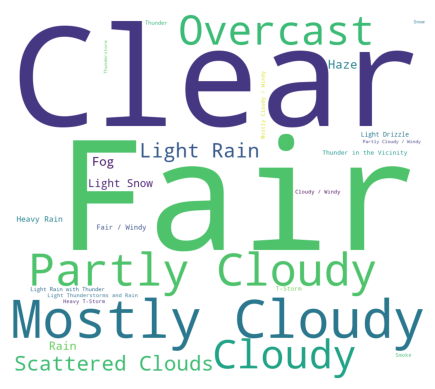

In [40]:
data = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800,background_color ='white',min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()


# Visibility(mi)

In [45]:
df['Visibility(mi)'].value_counts()

10.0     839173
7.0       30666
9.0       27290
8.0       22584
5.0       18794
          ...  
1.9           1
1.4           1
0.6           1
105.0         1
23.0          1
Name: Visibility(mi), Length: 62, dtype: int64

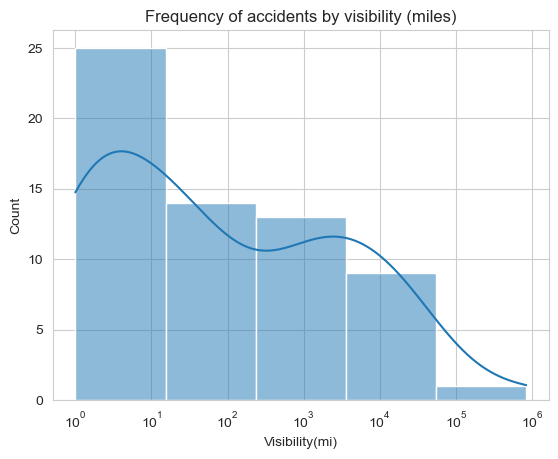

In [41]:

sns.histplot(df['Visibility(mi)'].value_counts(), bins= 5, kde=True, log_scale=True)
plt.title("Frequency of accidents by visibility (miles)")
plt.show()

# crosssing

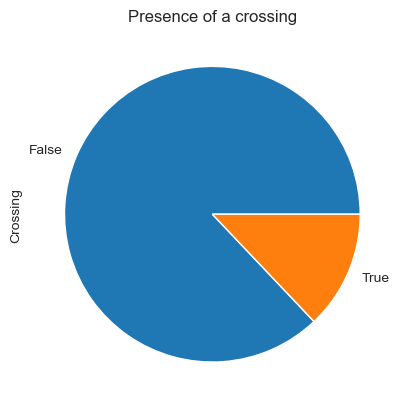

In [42]:
#The column records the presence of a crossing nearby at the point of the accident. “True” and “False” values is best visualized in a pie-chart-

a=df['Crossing'].value_counts().plot(kind= 'pie')

plt.title("Presence of a crossing")
plt.show()


# Traffic_signal

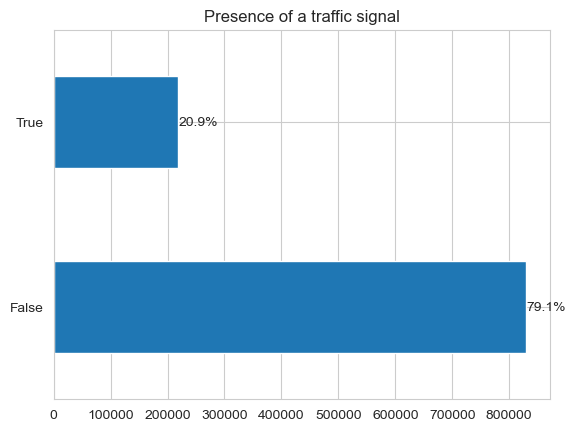

In [43]:
#A binary column indicating the presence of a traffic signal nearby the spot of the accident.
ax=df['Traffic_Signal'].value_counts().plot(kind='barh')
total=df['Traffic_Signal'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.title("Presence of a traffic signal")
plt.show()



# Bump

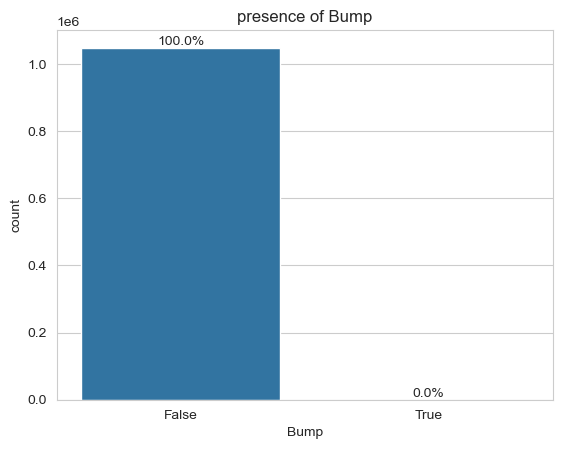

In [44]:
#A binary column indicating the presence of a speed bump nearby the spot of the accident.
ax=sns.countplot(x=df['Bump'])
plt.title("presence of Bump")
total=df['Bump'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()